
# Metrics to evaluate fit performance

The aim of this notebook is explore the performance of the light curves fitted trough
TRF algorithm using pyLIMA. To adress this analisys we explore five metrics.

* $\frac{\chi^2}{dof} = \frac{1}{dof}\sum_i \left(\frac{y_i-f_i}{\sigma_i}\right)^2 $
* $\frac{|true-fit|}{true}$
* $\frac{|true-fit|}{\sigma}$
* $\frac{\sigma}{true}$
* $\frac{\sigma_R - \sigma_{RR}}{true}$
  

In [1]:
# import the modules and scripts that we will use 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
import re
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA import event
from tqdm.auto import tqdm
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin/fit_codes')
# this codes are in the /fit_codes directory 
# https://github.com/anibal-art/roman_rubin/tree/main/fit_codes
from fit_results import chi_dof, best_model, errors,best_full_model
from analysis_metrics import m1,m2,m3,Bins, m4
from plot_models import plot_LCmodel



In [2]:
path_ephemerides = '/home/anibal/files_db/james_webb.txt' #PATH TO EPHEMERIDES
path_model = '/home/anibal/files_db/filtered_curves/'
path_fits = '/home/anibal/files_db/less_boundaries/'

models = os.listdir(path_model)
files_fits = os.listdir(path_fits)

files_roman = [f for f in files_fits if 'Roman' in f]
files_rr = [f for f in files_fits if not 'Roman' in f]

n_rom = [] # list with the event number
for j in files_roman:
    number = int(re.findall(r'\d+', j)[0])
    n_rom.append(number)

n_rr = [] # # list with the event number
for j in files_rr:
    number = int(re.findall(r'\d+', j)[0])
    n_rr.append(number)

# Convert lists to sets
set1 = set(n_rom)
set2 = set(n_rr)
# Find the common elements using intersection
common_elements = set1.intersection(set2)
# Convert the result back to a list (if needed)
common_elements_list = list(common_elements)
print(len(common_elements_list))


923


### compute the metrics for the entire set

In [3]:
chi2_rr = pd.DataFrame(columns=['source', 'chichi'])
chi2_roman = pd.DataFrame(columns=['source', 'chichi'])
met_1_rr = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_2_rr = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_3_rr = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_1_roman = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_2_roman = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_3_roman = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])
met_4 = pd.DataFrame(columns=['source', 't0', 'u0','tE','s','q','alpha','piEN','piEE'])

for e in tqdm(common_elements_list):
    roman_file = f'Event_Roman_{int(e)}_trf.npy'
    rr_file = f'Event_RR_{int(e)}_trf.npy'
    model_file = f'Event_{int(e)}.txt'
    value_to_add = e
    index_to_insert = 0
    met_1_rr.loc[len(met_1_rr)] = np.insert(m1(path_fits+rr_file,path_model+model_file), index_to_insert, value_to_add)
    met_2_rr.loc[len(met_2_rr)] = np.insert(m2(path_fits+rr_file,path_model+model_file), index_to_insert, value_to_add)
    met_3_rr.loc[len(met_3_rr)] = np.insert(m3(path_fits+rr_file,path_model+model_file), index_to_insert, value_to_add)
    
    met_1_roman.loc[len(met_1_roman)] = np.insert(m1(path_fits+roman_file,path_model+model_file), index_to_insert, value_to_add)
    met_2_roman.loc[len(met_2_roman)] = np.insert(m2(path_fits+roman_file,path_model+model_file), index_to_insert, value_to_add)
    met_3_roman.loc[len(met_3_roman)] = np.insert(m3(path_fits+roman_file,path_model+model_file), index_to_insert, value_to_add)
    
    met_4.loc[len(met_4)] = np.insert(m4(path_fits+rr_file,path_fits+roman_file), index_to_insert, value_to_add)
    
    chi2_rr.loc[len(chi2_rr)] = [value_to_add,chi_dof(path_model+model_file,path_fits+rr_file)]
    chi2_roman.loc[len(chi2_roman)] = [value_to_add,chi_dof(path_model+model_file,path_fits+roman_file)]


  0%|          | 0/923 [00:00<?, ?it/s]

# Plot the $\frac{\chi^2}{dof} = \frac{1}{dof}\sum_i \left(\frac{y_i-f_i}{\sigma_i}\right)^2 $ 

This will give us an idea of how well the fitter found a model for the light curve

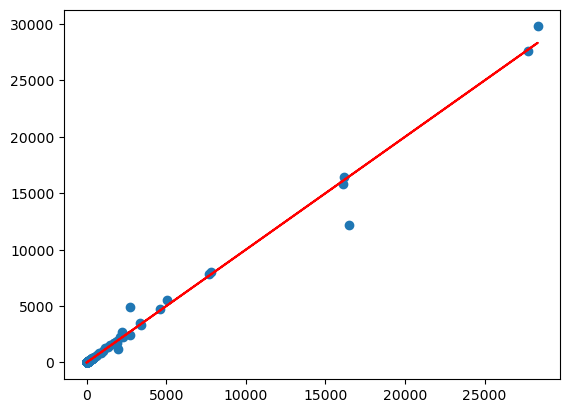

In [79]:
plt.plot(chi2_rr['chichi'],chi2_roman['chichi'],marker='o',linestyle='')

plt.plot(chi2_rr['chichi'],chi2_rr['chichi'],'-',color='red')
# plt.xlabel()

In [81]:
# plt.hist2d(chi2_rr['chichi'],chi2_roman['chichi'])

### From this is possible conclude that the fitted events od Roman have in general a more greater chi squared than the Roman+Rubin light curves combined

Events with Delta chi^2>0: 39.98 %
Events with Delta chi^2<0: 60.02 %


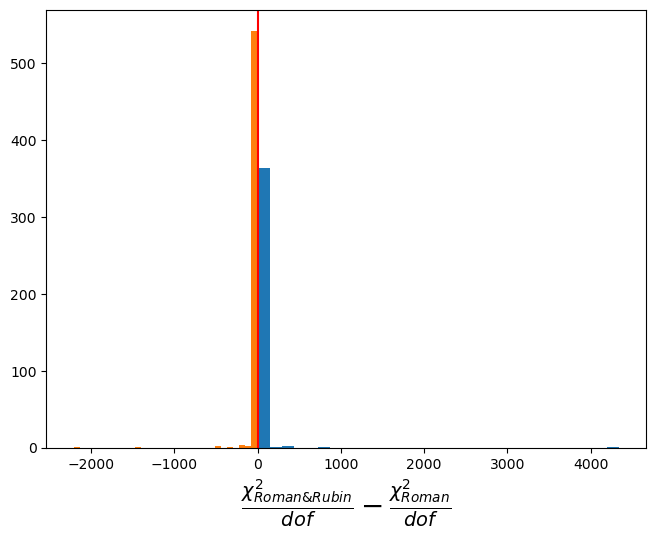

In [5]:
diff_chi = chi2_rr['chichi']-chi2_roman['chichi']
hist_1 = [v for v in diff_chi if  v < 0]
hist1= [v for v in diff_chi if 0 <v ]

plt.figure(figsize=(8,6),dpi=100)
plt.hist(hist1,bins = 30)#,marker='o',linestyle=' ')
plt.hist(hist_1,bins = 30)#,marker='o',linestyle=' ')
print('Events with Delta chi^2>0:',round(len(hist1)/len(diff_chi)*100,2),'%')
print('Events with Delta chi^2<0:',round(len(hist_1)/len(diff_chi)*100,2),'%')
plt.xlabel(r'$\frac{\chi^{2}_{  Roman & Rubin}}{dof}-\frac{\chi^{2}_{  Roman}}{dof}$',fontsize=20)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.axvline(0,color='red')

plt.show()

## It's relevant known how many events have chi squared high

In [6]:
chi_RR_OUT = chi2_rr[(chi2_rr['chichi']>2)]
chi_ROMAN_OUT = chi2_roman[(chi2_roman['chichi']>2)]

print(round(len(chi_RR_OUT)/len(chi2_rr)*100,1),'% events have chi^2 > 2')
print(round(len(chi_ROMAN_OUT)/len(chi2_roman)*100,2),'% events have chi^2 > 2')

9.3 % events have chi^2 > 2
9.21 % events have chi^2 > 2


In [83]:
chi_RR_OUT = chi2_rr[(chi2_rr['chichi']<1.2)]
chi_ROMAN_OUT = chi2_roman[(chi2_roman['chichi']<1.2)]

print(round(len(chi_RR_OUT)/len(chi2_rr)*100,1),'% events have chi^2 < 1.2')
print(round(len(chi_ROMAN_OUT)/len(chi2_roman)*100,2),'% events have chi^2 < 1.2')

90.4 % events have chi^2 < 1.2
90.57 % events have chi^2 < 1.2


### We can take a look into this events with high chi squared

In [7]:
high_chichi = list(set(chi_ROMAN_OUT['source'].values).intersection(set(chi_RR_OUT['source'].values)))


In [8]:

from filter_curves import read_curves
# save_figures = '/home/anibal/figures_presentation/'

def plot_tiny_fit_rr(path_model, path_file,mat_figure, mat_figure_axes):
    fit_params = best_full_model(path_file)
    curvas, params = read_curves(path_model)
    
    RA, DEC= 267.92497054815516, -29.152232510353276
    your_event = event.Event(ra=RA, dec=DEC)
    your_event.name = 'fit_rr:'+str(int(params['Source']))+'\n chi_sq='+str(round(chi_dof(path_model, path_file),4))

    telescope_1 = telescopes.Telescope(name = 'F146', 
                                       camera_filter = 'F146',
                                       light_curve = curvas['w'].astype(float),
                                       light_curve_names = ['time','mag','err_mag'],
                                       light_curve_units = ['JD','mag','mag'])

    telescope_1.location = 'Space'

    tlsst = 60350.38482057137+2400000.5
    ephemerides = np.loadtxt(path_ephemerides)
    ephemerides[:,0] = ephemerides[:,0]
    ephemerides[:,3] *=  60*300000/150000000
    deltaT = tlsst-ephemerides[:,0][0]
    ephemerides[:,0] = ephemerides[:,0]+deltaT
    telescope_1.spacecraft_positions ={'astrometry':[],'photometry':ephemerides}
    your_event.telescopes.append(telescope_1)
    if not len(curvas['u']) == 0:
        telescope_2 = telescopes.Telescope(name = 'LSST_u', 
                                           camera_filter = 'u',
                                           light_curve = curvas['u'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_2.location = 'Earth'
        your_event.telescopes.append(telescope_2)

    if not len(curvas['g']) == 0:

        telescope_3 = telescopes.Telescope(name = 'LSST_g', 
                                           camera_filter = 'g',
                                           light_curve = curvas['g'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_3.location = 'Earth'
        your_event.telescopes.append(telescope_3)

    if not len(curvas['r']) == 0:

        telescope_4 = telescopes.Telescope(name = 'LSST_r', 
                                           camera_filter = 'r',
                                           light_curve = curvas['r'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_4.location = 'Earth'
        your_event.telescopes.append(telescope_4)

    if not len(curvas['i']) == 0:

        telescope_5 = telescopes.Telescope(name = 'LSST_i', 
                                           camera_filter = 'i',
                                           light_curve = curvas['i'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_5.location = 'Earth'
        your_event.telescopes.append(telescope_5)


    if not len(curvas['z']) == 0:

        telescope_6 = telescopes.Telescope(name = 'LSST_z', 
                                           camera_filter = 'z',
                                           light_curve = curvas['z'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_6.location = 'Earth'
        your_event.telescopes.append(telescope_6)


    if not len(curvas['y']) == 0:

        telescope_7 = telescopes.Telescope(name = 'LSST_y', 
                                           camera_filter = 'y',
                                           light_curve = curvas['y'].astype(float),
                                           light_curve_names = ['time','mag','err_mag'],
                                           light_curve_units = ['JD','mag','mag'])
        telescope_7.location = 'Earth'
        your_event.telescopes.append(telescope_7)

    model_params = [params['t0'],params['u0'],params['te'],params['s'],params['q'],params['alpha'],params['piEN'],params['piEE']]

    your_event.check_event()

    psbl = PSBL_model.PSBLmodel(your_event, parallax=['Full', params['t0']])

    list_of_fake_telescopes = []
    
    plot_LCmodel(psbl,  fit_params,mat_figure, mat_figure_axes)

def plot_tiny_fit_roman(path_model, path_file,mat_figure, mat_figure_axes):
    fit_params = best_full_model(path_file)
    curvas, params = read_curves(path_model)
         
    RA, DEC= 267.92497054815516, -29.152232510353276
    roman_event = event.Event(ra=RA, dec=DEC)
    
    roman_event.name = 'fit_Roman:'+str(int(params['Source']))+'\n chi_sq='+str(round(chi_dof(path_model, path_file),4))

    telescope_1 = telescopes.Telescope(name = 'F146', 
                                       camera_filter = 'F146',
                                       light_curve = curvas['w'].astype(float),
                                       light_curve_names = ['time','mag','err_mag'],
                                       light_curve_units = ['JD','mag','mag'])

    telescope_1.location = 'Space'

    tlsst = 60350.38482057137+2400000.5
    ephemerides = np.loadtxt(path_ephemerides)
    ephemerides[:,0] = ephemerides[:,0]
    ephemerides[:,3] *=  60*300000/150000000
    deltaT = tlsst-ephemerides[:,0][0]
    ephemerides[:,0] = ephemerides[:,0]+deltaT
    telescope_1.spacecraft_positions ={'astrometry':[],'photometry':ephemerides}
    roman_event.telescopes.append(telescope_1)
    roman_event.check_event()

    psbl_roman = PSBL_model.PSBLmodel(roman_event, parallax=['Full', params['t0']])
    model_params = [params['t0'],params['u0'],params['te'],params['s'],params['q'],params['alpha'],params['piEN'],params['piEE']]

    list_of_fake_telescopes = []

    mat_figure, figure_bokeh = plot_LCmodel(psbl_roman, fit_params,mat_figure, mat_figure_axes)

check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 15 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 136 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 136 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 136 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packag

Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3533 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3533 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3533 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3791 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3791 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3791 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41358 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41358 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58462 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58462 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3832 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3832 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3832 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3860 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3860 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3860 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3835 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3835 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3835 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2798 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2798 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2798 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_i: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2716 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2716 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2716 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_r: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41469 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58573 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58573 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3568 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3568 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3568 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3144 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3144 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3144 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2515 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2515 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2515 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_i: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3009 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3009 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3009 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41437 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41437 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58541 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58541 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3507 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3507 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3507 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3491 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3491 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3491 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41469 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58573 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58573 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3473 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3473 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3473 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2639 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2639 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2639 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_i: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41447 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41447 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58551 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58551 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3763 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3763 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3763 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41465 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41465 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58569 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58569 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3966 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3966 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3966 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3503 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3503 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3503 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41449 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41449 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58553 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58553 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3469 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2803 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2803 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2803 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_r: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_u: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 4072 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 4072 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 4072 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_u: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2622 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2622 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2622 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_r: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3591 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3591 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3591 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_g: SUCCESS
Parallax(Full) estimated for the telescope LSST_r: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS
Parallax(Full) estimated for the telescope LSST_y: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 3836 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3836 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 3836 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_g: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packa

Parallax(Full) estimated for the telescope F146: SUCCESS
Parallax(Full) estimated for the telescope LSST_i: SUCCESS
Parallax(Full) estimated for the telescope LSST_z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2847 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2847 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 2847 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope LSST_i: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41358 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41358 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58462 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58462 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41469 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58573 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58573 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41437 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41437 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58541 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58541 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41472 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41472 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58576 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58576 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS
check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 41469 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 41469 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 58573 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 58573 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope F146: SUCCESS


KeyboardInterrupt: 

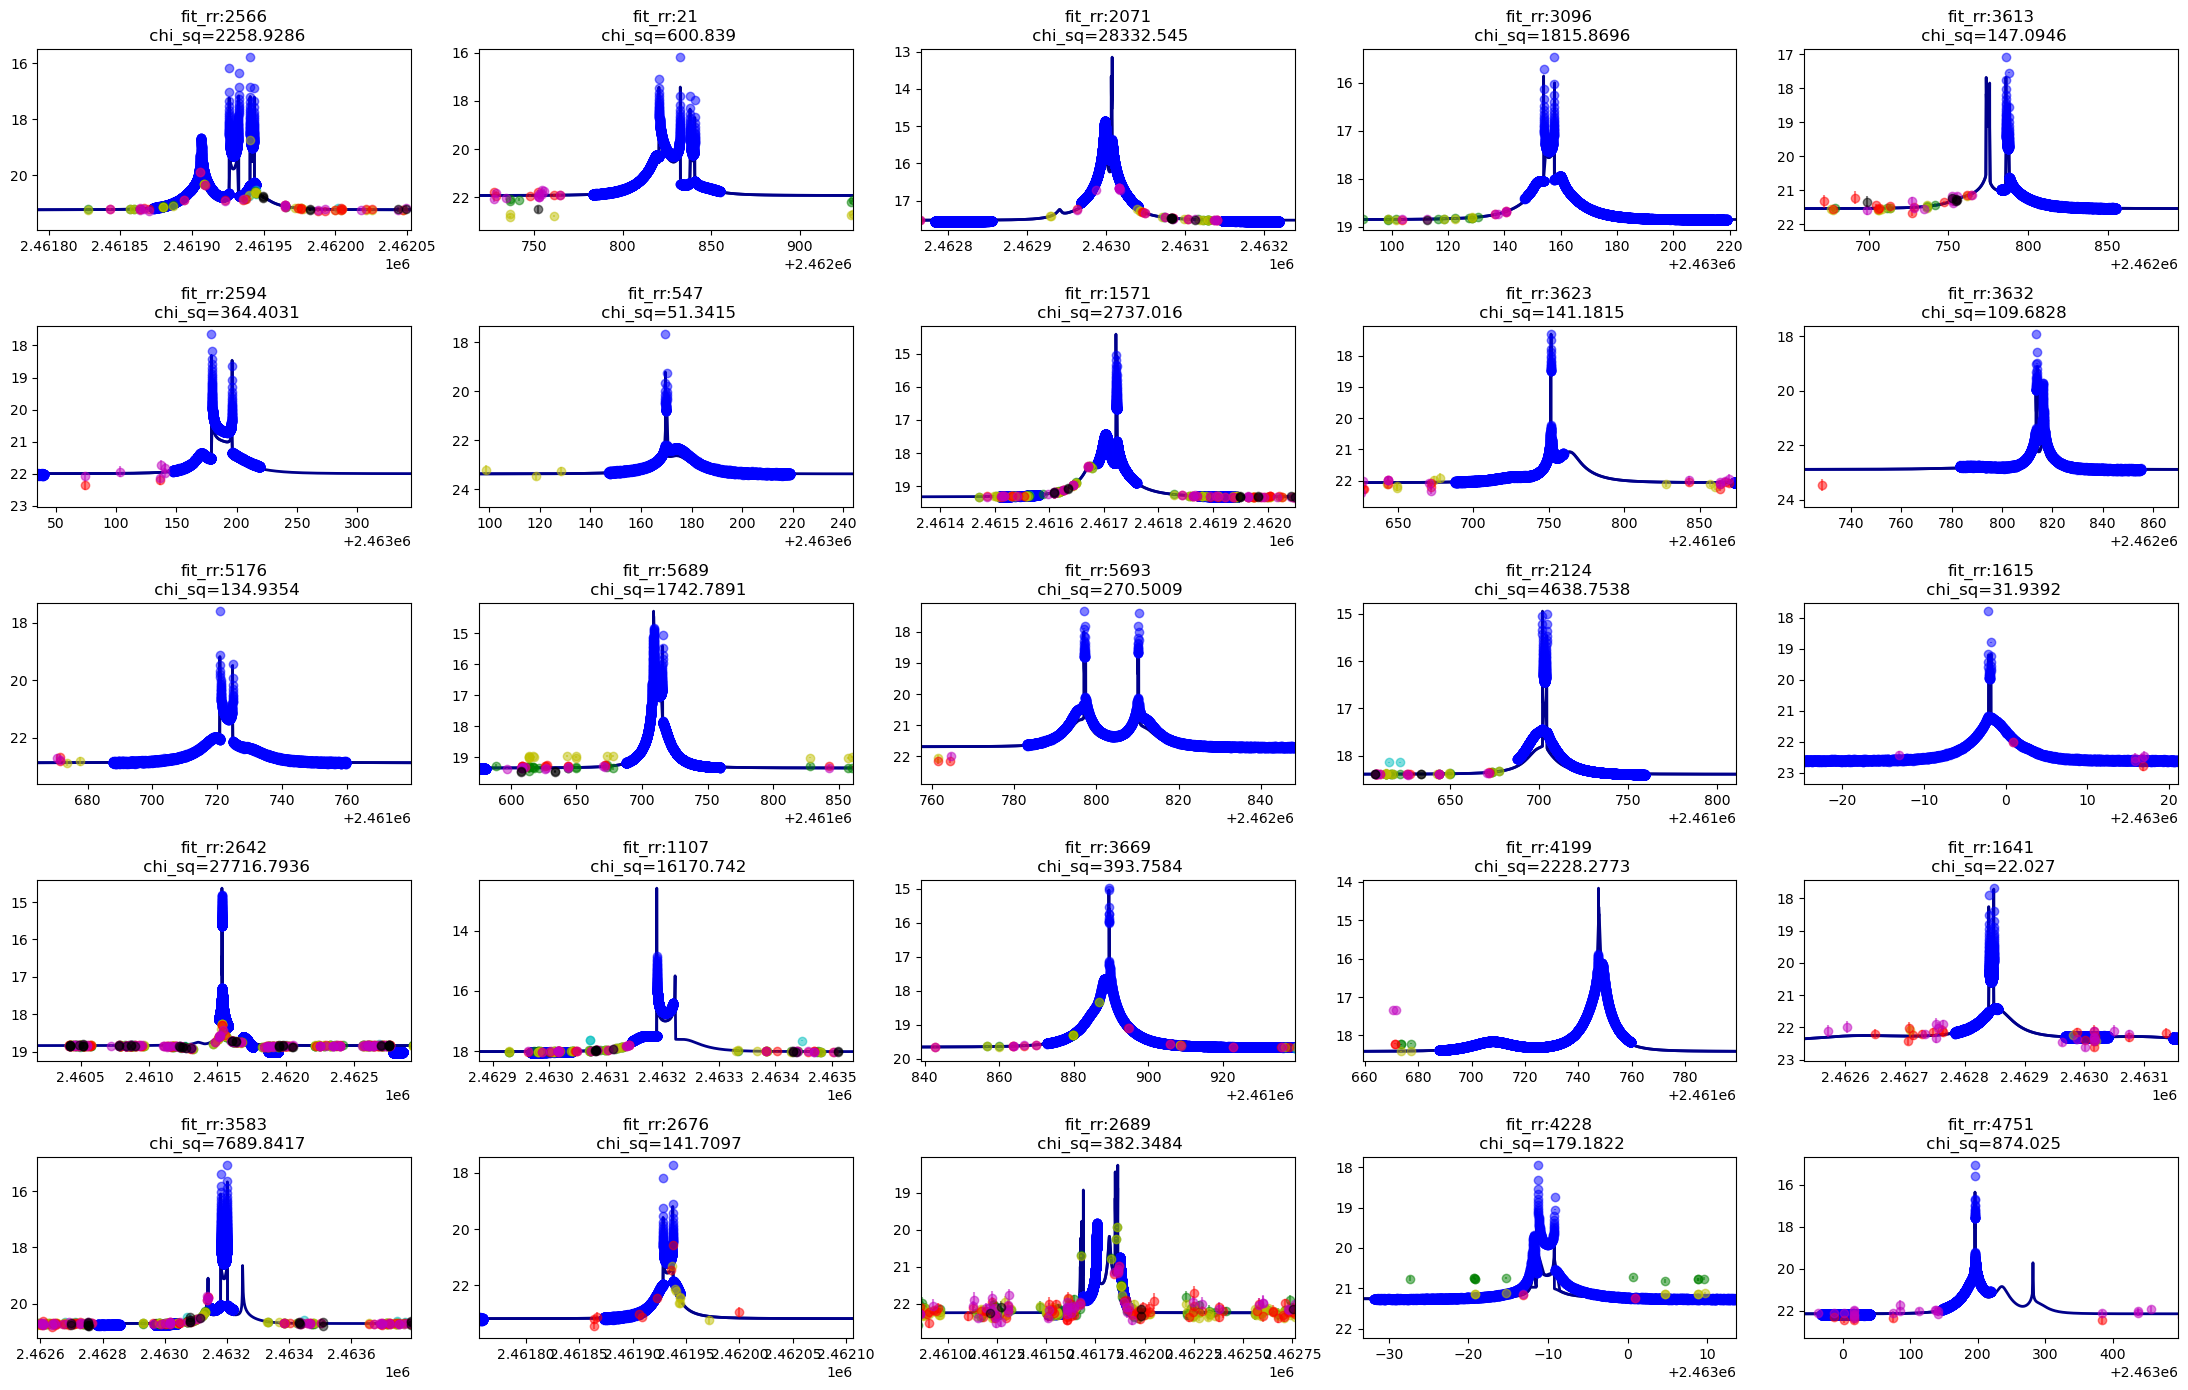

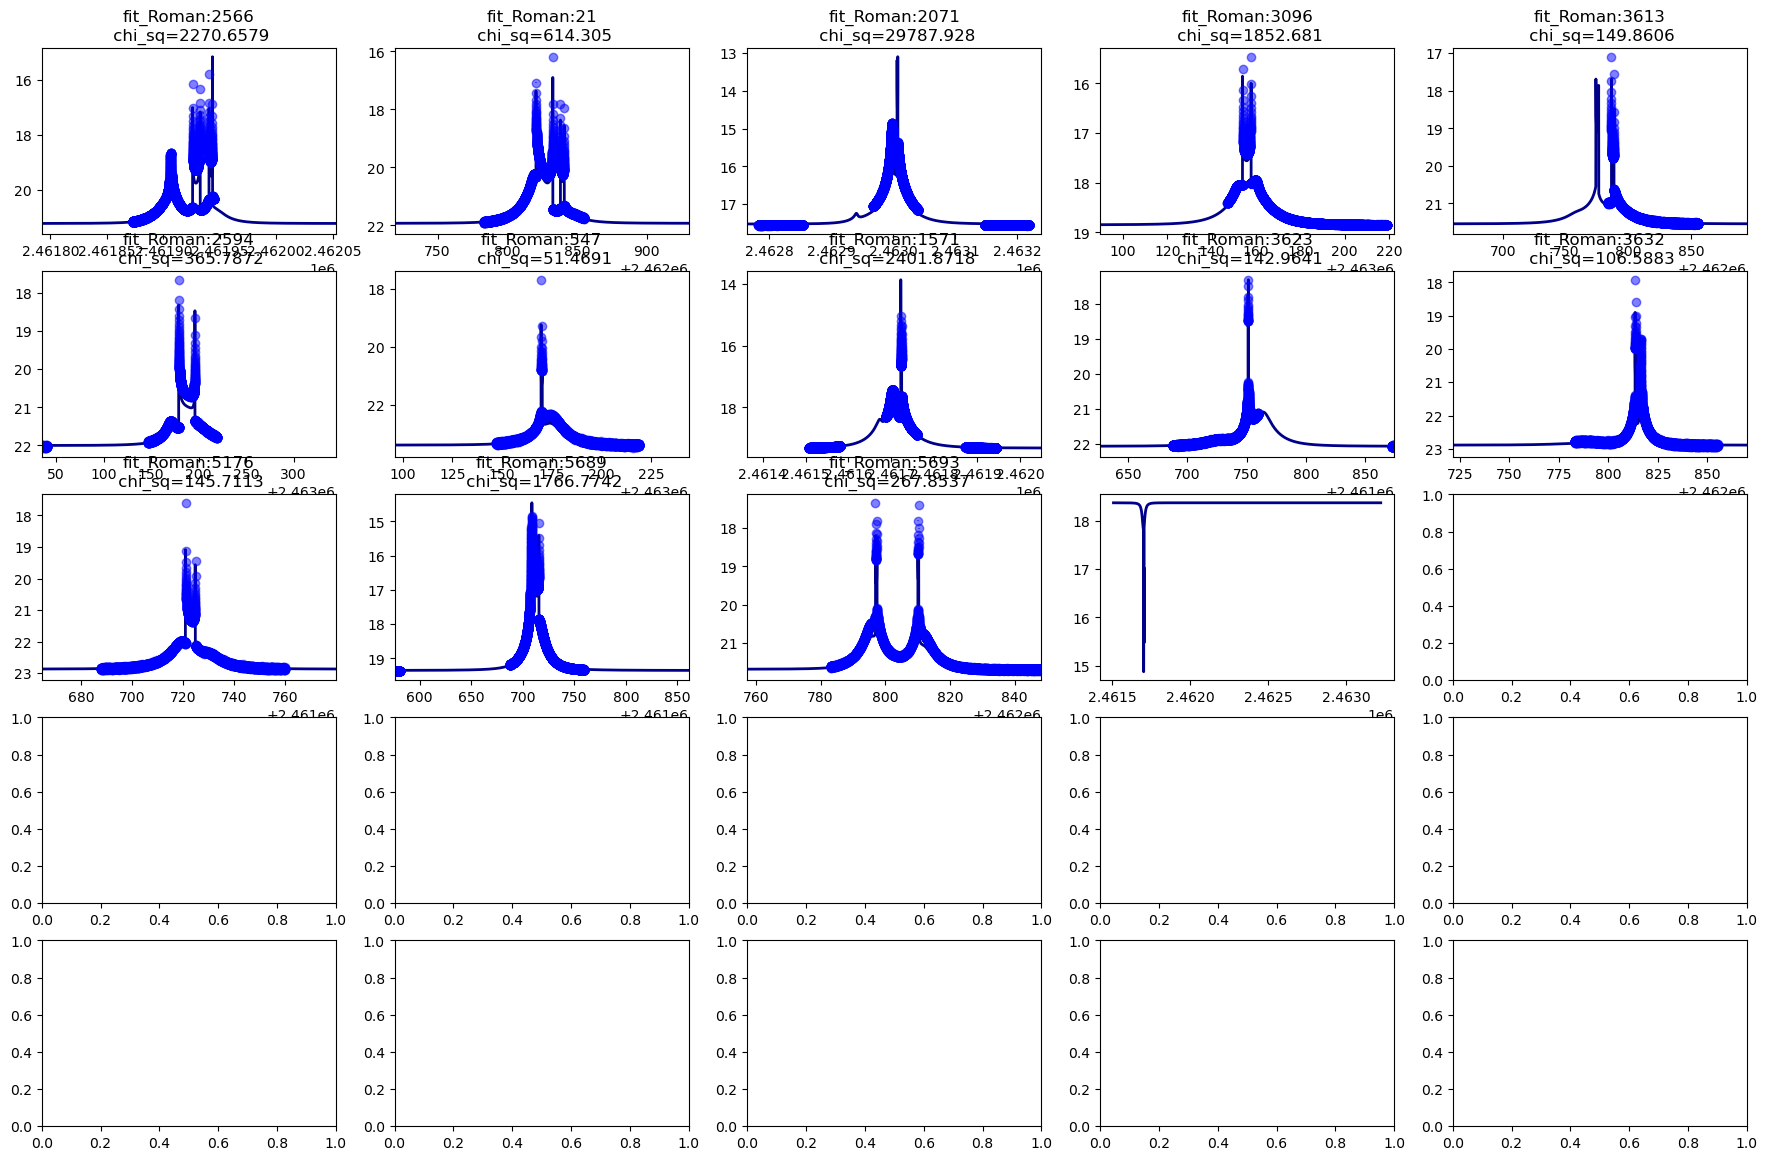

In [9]:
save_figures = '/home/anibal/Downloads/'

def plots_tiny_roman(common_elements_list):
    filas = 5
    columnas = 5
    mat_figure, mat_figure_axes = plt.subplots(filas, columnas, figsize=(22, 14))  # Create a 2x4 grid of subplots with a specific size
    # Loop through each property and plot its histogram in the corresponding subplot
    for i, p in enumerate(range(filas*columnas)):
        row, col = divmod(i, columnas)  # Calculate the row and column index for the current subplot
        roman_file, rr_file = f'Event_Roman_{int(common_elements_list[i])}_trf.npy',f'Event_RR_{int(common_elements_list[i])}_trf.npy'
        model_file = f'Event_{int(common_elements_list[i])}.txt'
        plot_tiny_fit_roman(path_model+model_file, path_fits+roman_file,mat_figure, mat_figure_axes[row, col])
    plt.tight_layout()
    plt.savefig(save_figures+'lc_tinyplots_roman.png')



def plots_tiny_rr(common_elements_list):
    filas = 5
    columnas = 5
    mat_figure, mat_figure_axes = plt.subplots(filas, columnas, figsize=(22, 14))  # Create a 2x4 grid of subplots with a specific size
    # Loop through each property and plot its histogram in the corresponding subplot
    for i, p in enumerate(range(filas*columnas)):
        row, col = divmod(i, columnas)  # Calculate the row and column index for the current subplot
        roman_file, rr_file = f'Event_Roman_{int(common_elements_list[i])}_trf.npy',f'Event_RR_{int(common_elements_list[i])}_trf.npy'
        model_file = f'Event_{int(common_elements_list[i])}.txt'
        plot_tiny_fit_rr(path_model+model_file, path_fits+rr_file,mat_figure, mat_figure_axes[row, col])
    plt.tight_layout()
    plt.savefig(save_figures+'lc_tinyplots_rr.png')
    
plots_tiny_rr(high_chichi)
plots_tiny_roman(high_chichi)

# Next we consider the metric  $\frac{|true-fit|}{true}$

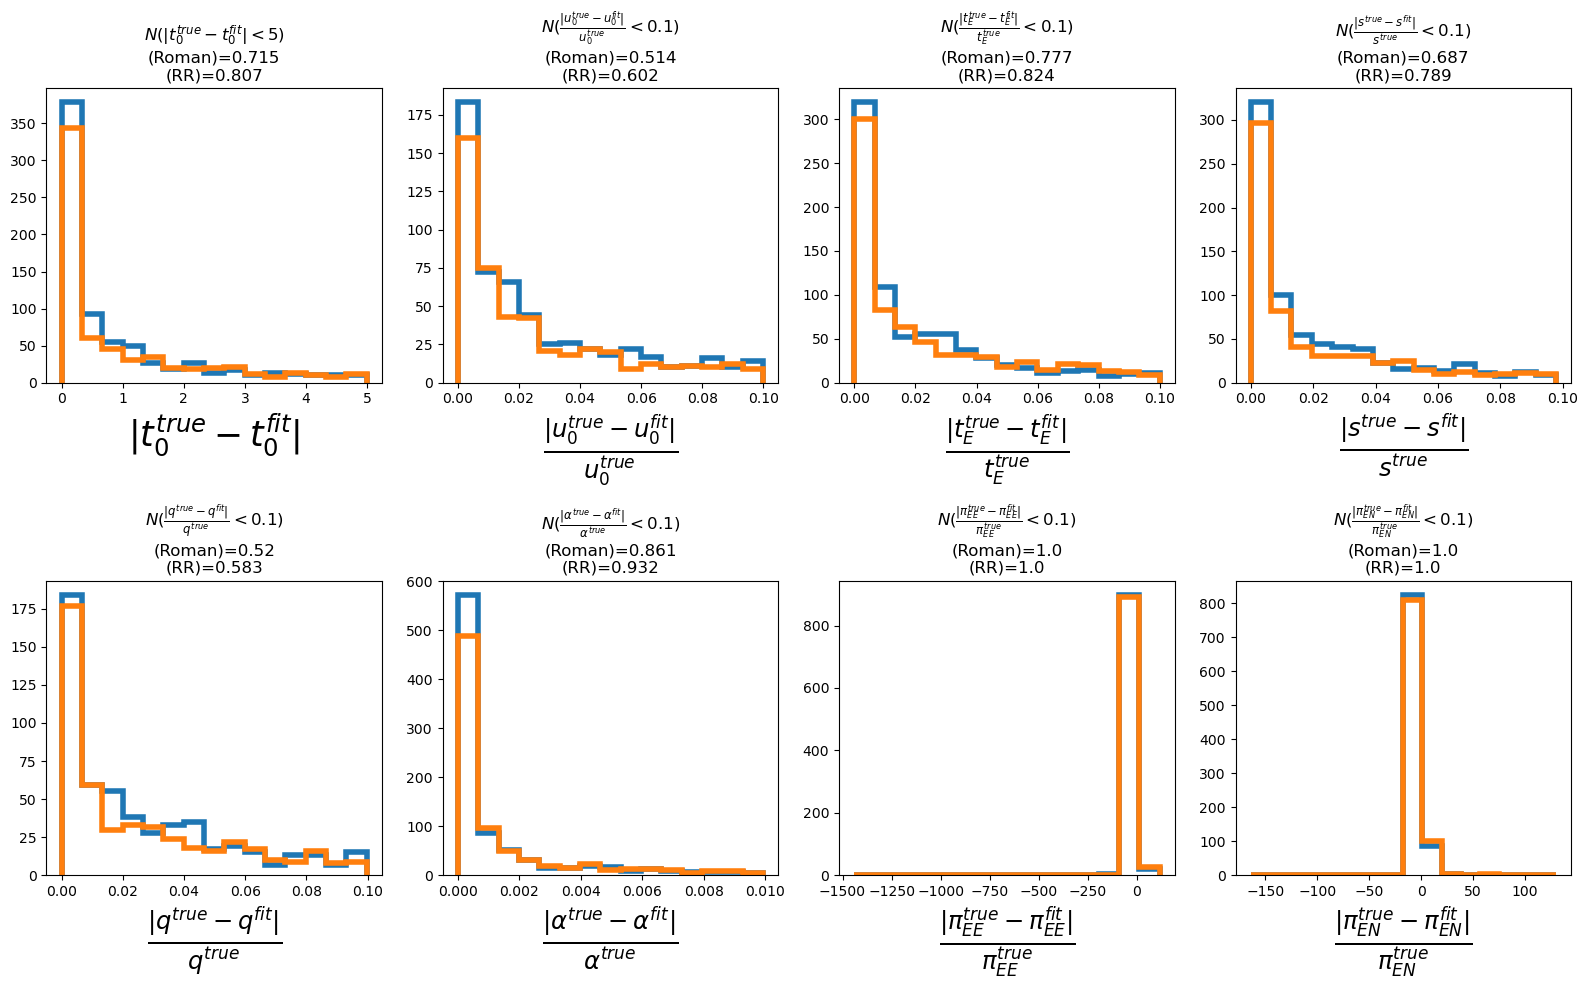

In [73]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))  # Create a 2x4 grid of subplots with a specific size

# Define the list of properties 'p' for histograms
properties = ('t0', 'u0', 'tE', 's', 'q', 'alpha', 'piEE', 'piEN')
labels = {'t0':'t_0', 'u0':'u_0', 'tE':'t_E', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
ub = 0.1
# lb= -0.01
# Loop through each property and plot its histogram in the corresponding subplot
for i, p in enumerate(properties):
    row, col = divmod(i, 4)  # Calculate the row and column index for the current subplot
    
    if p == 't0': 
        lrr = [v for v in met_1_rr[p] if v<5]
        lroman = [v for v in met_1_roman[p] if v<5]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4)  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4)
        text = r'$|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|$'
        axs[row, col].set_xlabel(text,fontsize=25)
        text_rr = f'(RR)={round(len(lrr)/len(met_1_rr[p]),3)}'
        text_roman = f'(Roman)={round(len(lroman)/len(met_1_roman[p]),3)}'
        textbox = r'$N(|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|<5)$\n'+text_roman+'\n'+text_rr
        axs[row, col].set_title(textbox)
     

        
    elif p=='piEE' or p=='piEN':
        lrr = [v for v in met_1_rr[p] ]
        lroman = [v for v in met_1_roman[p]]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4)  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4)
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        text_rr = f'(RR)={round(len(lrr)/len(met_1_rr[p]),3)}'
        text_roman = f'(Roman)={round(len(lroman)/len(met_1_roman[p]),3)}'
        textbox = r'$N(\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}<0.1)$\n'+text_roman+'\n'+text_rr
        axs[row, col].set_title(textbox)
     
    elif p=='alpha':
        lrr = [v for v in met_1_rr[p] if v<0.01]
        lroman = [v for v in met_1_roman[p] if v<0.01]
        
        text_rr = f'(RR)={round(len(lrr)/len(met_1_rr[p]),3)}'
        text_roman = f'(Roman)={round(len(lroman)/len(met_1_roman[p]),3)}'
        textbox = r'$N(\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}<0.1)$\n'+text_roman+'\n'+text_rr
        axs[row, col].set_title(textbox)
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4)  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4)
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}$'
        axs[row, col].set_xlabel(text,fontsize=25)

    
    else:
        lrr = [v for v in met_1_rr[p] if v<ub]
        lroman = [v for v in met_1_roman[p] if v<ub]
        
        text_rr = f'(RR)={round(len(lrr)/len(met_1_rr[p]),3)}'
        text_roman = f'(Roman)={round(len(lroman)/len(met_1_roman[p]),3)}'
        textbox = r'$N(\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}<0.1)$\n'+text_roman+'\n'+text_rr
        axs[row, col].set_title(textbox)
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4)  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4)
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}}$'
        axs[row, col].set_xlabel(text,fontsize=25)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

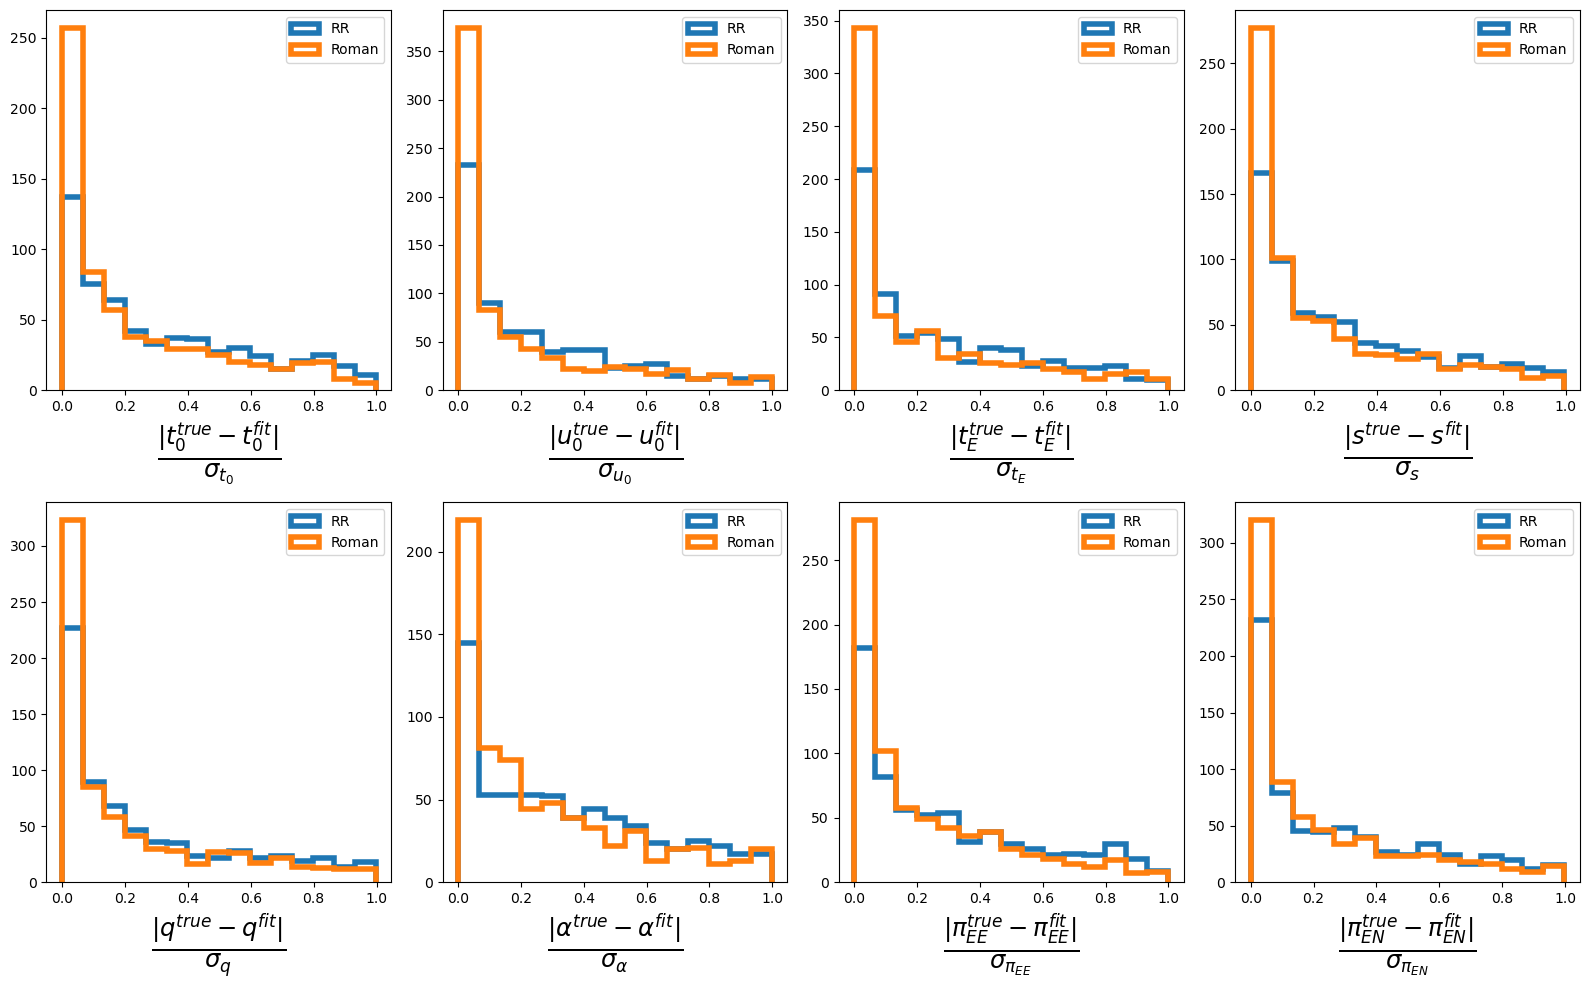

In [91]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))  # Create a 2x4 grid of subplots with a specific size

# Define the list of properties 'p' for histograms
properties = ('t0', 'u0', 'tE', 's', 'q', 'alpha', 'piEE', 'piEN')
labels = {'t0':'t_0', 'u0':'u_0', 'tE':'t_E', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
ub = 0.01
lb= -0.01
# Loop through each property and plot its histogram in the corresponding subplot
for i, p in enumerate(properties):
    row, col = divmod(i, 4)  # Calculate the row and column index for the current subplot
    
    if p == 't0': 
        lrr = [v for v in met_2_rr[p] if v<1]
        lroman = [v for v in met_2_roman[p] if v<1]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')
    
    elif p=='piEE' or p=='piEN':
        lrr = [v for v in met_2_rr[p]  if v<1]
        lroman = [v for v in met_2_roman[p] if v<1]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')

    else:
        lrr = [v for v in met_2_rr[p] if v<1]
        lroman = [v for v in met_2_roman[p] if v<1]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')
# Adjust layout and spacing between subplots

plt.tight_layout()

# Show the figure
plt.show()

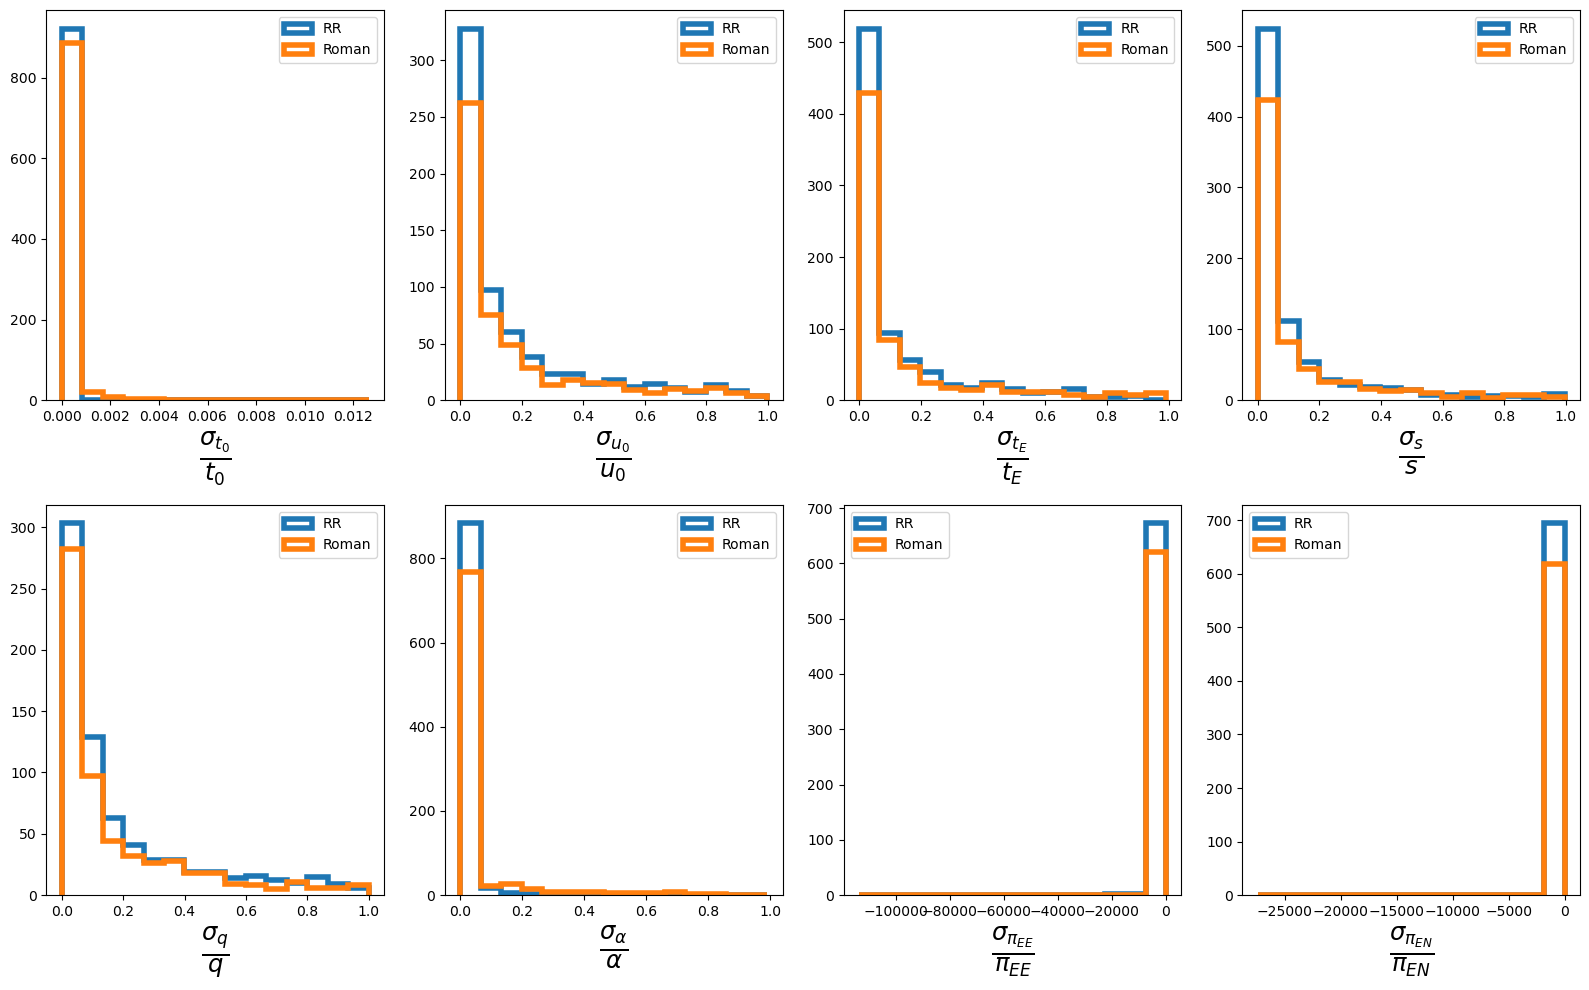

In [93]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))  # Create a 2x4 grid of subplots with a specific size

# Define the list of properties 'p' for histograms
properties = ('t0', 'u0', 'tE', 's', 'q', 'alpha', 'piEE', 'piEN')
labels = {'t0':'t_0', 'u0':'u_0', 'tE':'t_E', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
ub = 0.01
lb= -0.01
# Loop through each property and plot its histogram in the corresponding subplot
for i, p in enumerate(properties):
    row, col = divmod(i, 4)  # Calculate the row and column index for the current subplot
    
    if p == 't0': 
        lrr = [v for v in met_3_rr[p] if v<1]
        lroman = [v for v in met_3_roman[p] if v<1]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')
    
    elif p=='piEE' or p=='piEN':
        lrr = [v for v in met_3_rr[p] if v<1]# if lb<v<ub]
        lroman = [v for v in met_3_roman[p] if v<1]# if lb<v<ub]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')

    else:
        lrr = [v for v in met_3_rr[p] if v<1]# if lb<v<ub]
        lroman = [v for v in met_3_roman[p] if v<1]# if lb<v<ub]
        axs[row, col].hist(lrr,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='RR')  # Plot the histogram
        axs[row, col].hist(lroman,bins = Bins(lrr,lroman,15),histtype='step',lw=4,label='Roman')
        text = r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'}$'
        axs[row, col].set_xlabel(text,fontsize=25)
        axs[row, col].legend(loc='best')

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

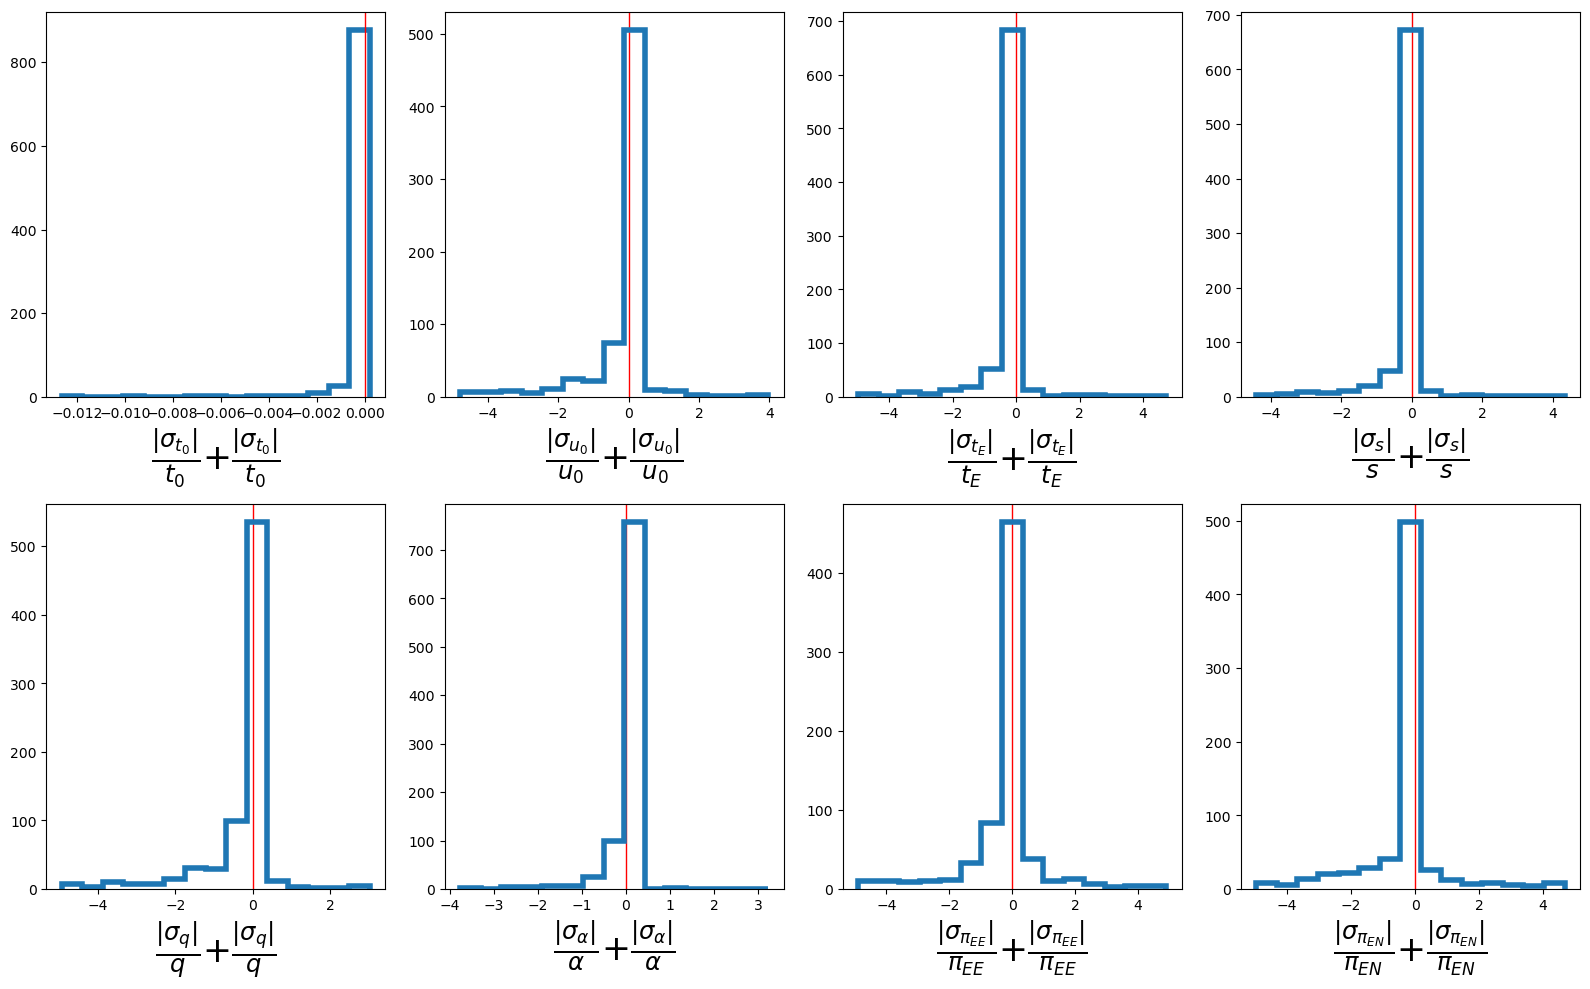

In [95]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))  # Create a 2x4 grid of subplots with a specific size

# Define the list of properties 'p' for histograms
properties = ('t0', 'u0', 'tE', 's', 'q', 'alpha', 'piEE', 'piEN')
labels = {'t0':'t_0', 'u0':'u_0', 'tE':'t_E', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
ub = 0.01
lb= -0.01
# Loop through each property and plot its histogram in the corresponding subplot
for i, p in enumerate(properties):
    row, col = divmod(i, 4)  # Calculate the row and column index for the current subplot
    
    if p == 't0': 
        lrr = [v for v in met_4[p] if -5<v<5]
        axs[row, col].hist(lrr,bins = 15,histtype='step',lw=4)  # Plot the histogram
        axs[row, col].axvline(0,color='red',lw=1)
        text = r'$\frac{|\sigma_{'+f'{labels[p]}'+'}'+'|}{'+f'{labels[p]}'+'}}$+'+r'$\frac{|\sigma_{'+f'{labels[p]}'+'}|}{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)
    
    elif p=='piEE' or p=='piEN':
        lrr = [v for v in met_4[p] if -5<v<5]
        axs[row, col].axvline(0,color='red',lw=1)
        axs[row, col].hist(lrr,bins =15,histtype='step',lw=4)  # Plot the histogram
        text = r'$\frac{|\sigma_{'+f'{labels[p]}'+'}'+'|}{'+f'{labels[p]}'+'}}$+'+r'$\frac{|\sigma_{'+f'{labels[p]}'+'}|}{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)

    else:
        lrr = [v for v in met_4[p] if -5<v<5]
        axs[row, col].axvline(0,color='red',lw=1)
        axs[row, col].hist(lrr,bins = 15,histtype='step',lw=4)  # Plot the histogram
        text = r'$\frac{|\sigma_{'+f'{labels[p]}'+'}'+'|}{'+f'{labels[p]}'+'}}$+'+r'$\frac{|\sigma_{'+f'{labels[p]}'+'}|}{'+f'{labels[p]}'+'}}$'
        axs[row, col].set_xlabel(text,fontsize=25)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()